## Linear Regression Assignment
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other independent variable.
Here is the code to load the data:

import numpy as np

import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

import sklearn

from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)

In [1]:
# For this assignment we will need the following libraries and modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# description of boston dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# columns in the boston dataset
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# add the column names to the dataframe
bos.columns = boston['feature_names']
# add the price column to the dataframe
bos['Price'] = boston['target']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Declare the dependent and independent variables

In [7]:
y = bos['Price'] # dependent variable
X = bos.drop(columns = 'Price') # independent variables

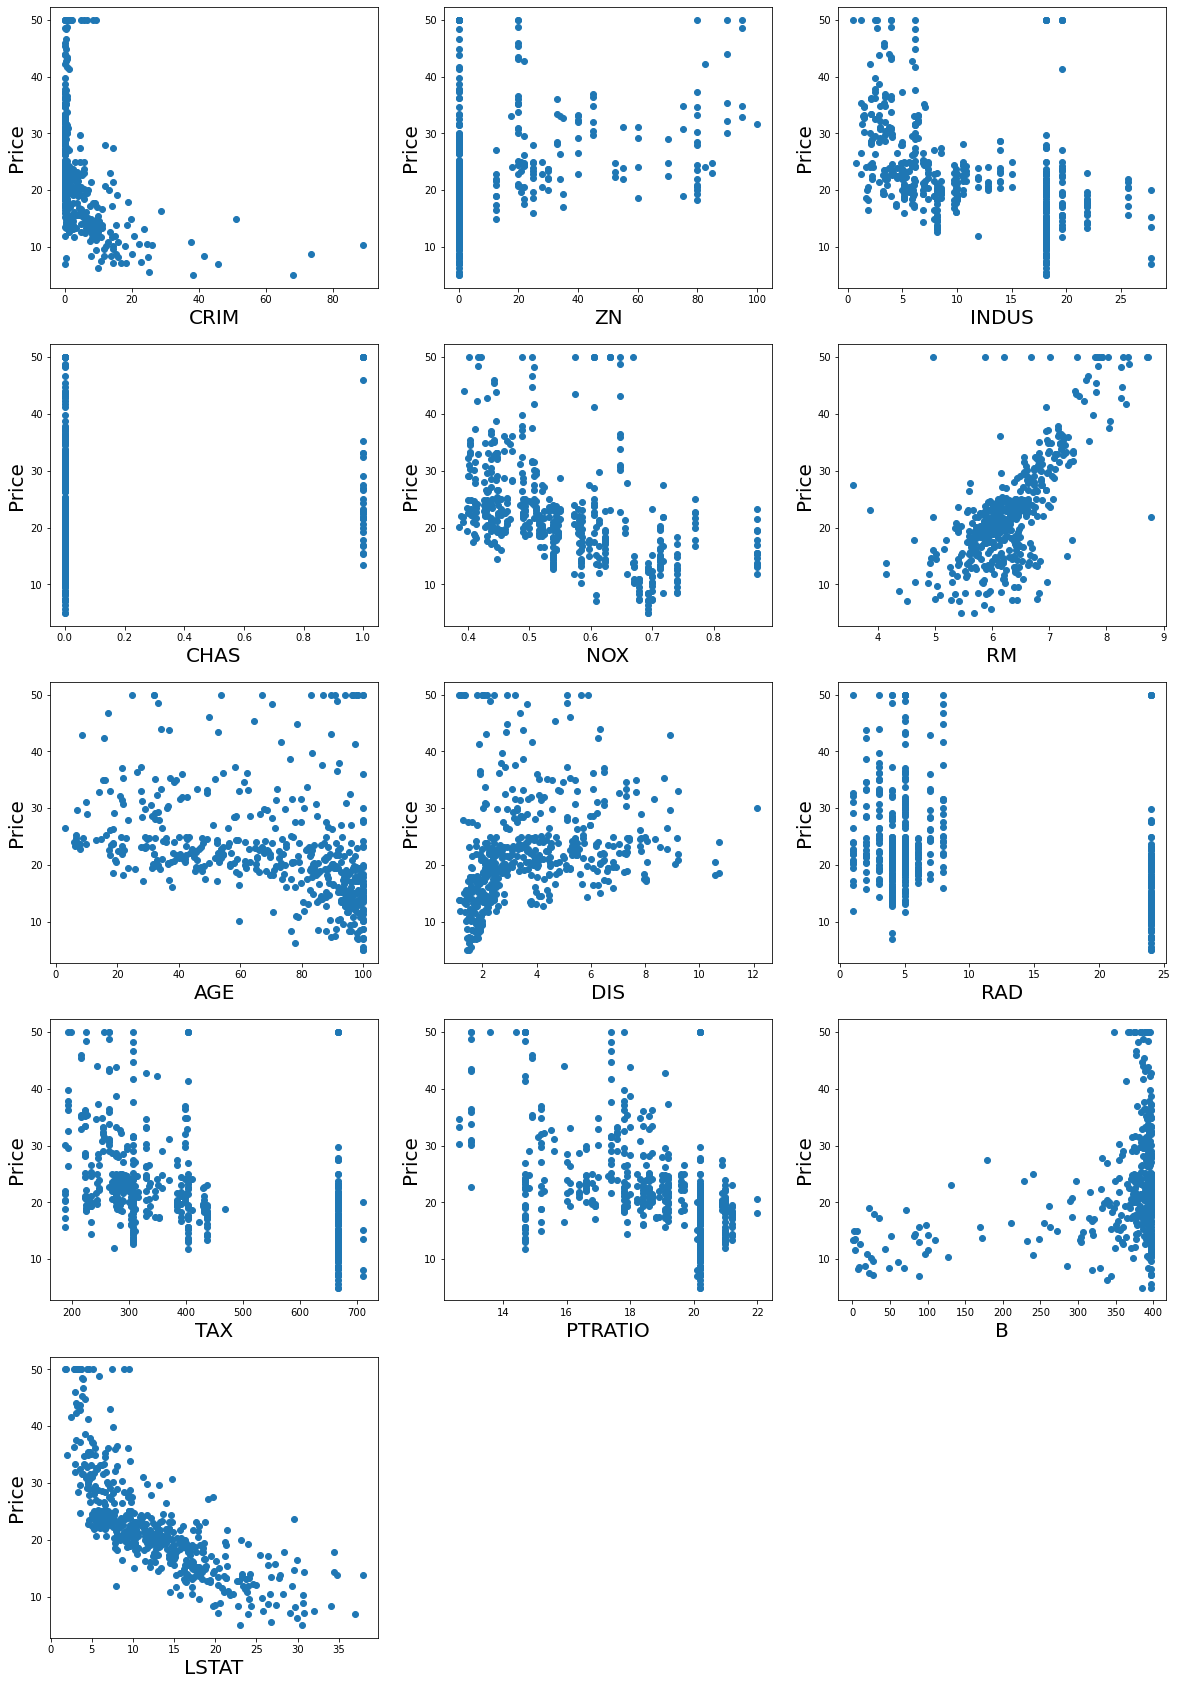

In [8]:
# visualise how the dependent variable varies with respect to each of the independent features
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(5, 3, plotnumber)
    plt.scatter(X[column], y)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plotnumber+=1

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.


### Multicollinearity

In [9]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
### fit_transform
X_scaled=scaler.fit_transform(X)

# we use variance_inflation_factor from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# Include names of features so it is easier to explore the result
vif["Features"] = X.columns

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


Here, we have the correlation values for all the features. The VIFs are all less than 10, indicating that multicollinearity is not a serious concern.


### Train Test Split

In [10]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=365)

### Create the regression

In [11]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train, y_train)

print('R-squared = ', reg.score(x_train, y_train))

# Let's create a function to create adjusted R-Squared
def adj_r2(model, x, y):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print('Adjusted R-squared = ', adj_r2(reg, x_train, y_train))

R-squared =  0.7343562521050351
Adjusted R-squared =  0.7255014605085363


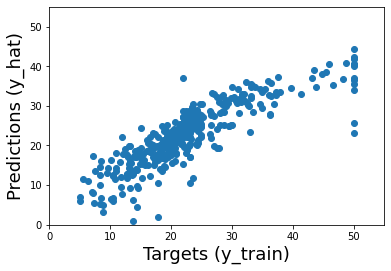

In [12]:
# Let's check the outputs of the regression
# Store the predicted values in y_hat
y_hat = reg.predict(x_train)

# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
# We want the x-axis and the y-axis to be the same to interpret the '45-degree line'
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

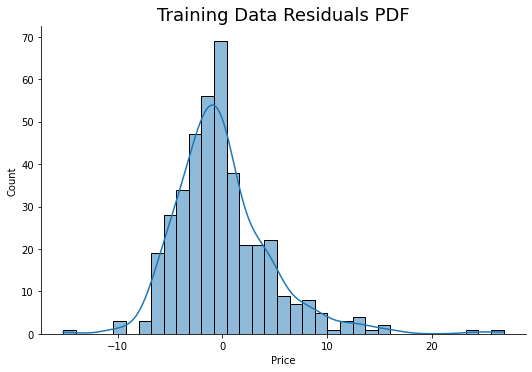

In [13]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies

import seaborn as sns
sns.displot(y_train - y_hat, kde=True, aspect=1.5)

# Include a title
plt.title("Training Data Residuals PDF", size=18)
plt.show()

# In the best case scenario this plot should be normally distributed

### Finding the weights and bias

In [14]:
# Create a regression summary of the bias (intercept) and the weights (coefficients) of the regression
reg_summary = pd.DataFrame(np.append('Intercept', X.columns.values), columns=['Features'])
reg_summary['Weights'] = np.append(reg.intercept_, reg.coef_)
reg_summary

,Features,Weights
0,Intercept,22.434755
1,CRIM,-1.076565
2,ZN,0.897201
3,INDUS,0.196910
4,CHAS,0.762864
5,NOX,-1.964066
6,RM,2.622168
7,AGE,-0.033001
8,DIS,-2.941089
9,RAD,2.666424


## Testing

Test Data R-squared =  0.7556969683218399
Test Data Adjusted R-squared =  0.7196067477330208


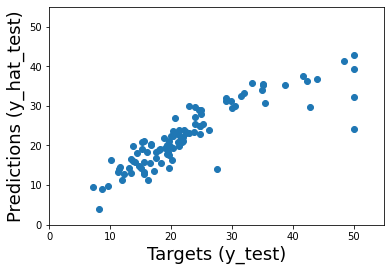

In [15]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted

print('Test Data R-squared = ', reg.score(x_test, y_test))
print('Test Data Adjusted R-squared = ', adj_r2(reg, x_test, y_test))
y_hat_test = reg.predict(x_test)

# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.show()

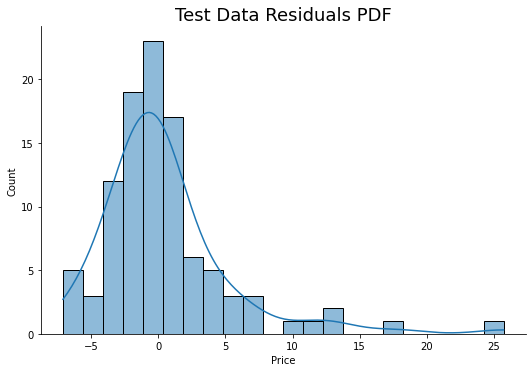

In [16]:
# We can plot the PDF of the residuals in the test data and check for anomalies

sns.displot(y_test - y_hat_test, kde=True, aspect=1.5)

# Include a title
plt.title("Test Data Residuals PDF", size=18)
plt.show()

# In the best case scenario this plot should be normally distributed

## Significant and Insignificant Features

In [17]:
# lets use the ols from statsmodels library to see the summary of the regression results
import statsmodels.formula.api as smf

# Create a dataframe containing the x_train and y_train 
x_train_df = pd.DataFrame(x_train, columns=X.columns)
# to get a proper result, we must reset the old index from y_train
y_train = y_train.reset_index(drop=True)
x_train_df['Price'] = y_train

lm = smf.ols(formula = 'Price ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
             data = x_train_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     82.93
Date:                Tue, 18 May 2021   Prob (F-statistic):          1.52e-103
Time:                        10:53:03   Log-Likelihood:                -1192.9
No. Observations:                 404   AIC:                             2414.
Df Residuals:                     390   BIC:                             2470.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4348      0.235     95.293      0.000      21.972      22.898
CRIM          -1.0766      0.306     -3.523      0.000      -1.677      -0.476
ZN             0.8972      0.351      2.553      0.011       0.206       1.588
INDUS          0.1969      0.472      0.417      0.677      -0.732       1.125
CHAS           0.7629      0.247      3.084      0.002       0.276       1.249
NOX           -1.9641      0.507     -3.873      0.000      -2.961      -0.967
RM             2.6222      0.348      7.545      0.000       1.939       3.305
AGE           -0.0330      0.408     -0.081      0.936      -0.835       0.769
DIS           -2.9411      0.452     -6.507      0.000      -3.830      -2.052
RAD            2.6664      0.645      4.134      0.000       1.398       3.935
TAX           -2.2281      0.701     -3.176      0.002      -3.607      -0.849
PTRATIO       -2.1632      0.313     -6.922      0.000      -2.778      -1.549
B              0.7725      0.291      2.653      0.008       0.200       1.345
LSTAT         -3.5654      0.408     -8.749      0.000      -4.367      -2.764
==============================================================================
Omnibus:                      133.117   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.521
Skew:                           1.407   Prob(JB):                    4.24e-118
Kurtosis:                       7.919   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### P-values for all the features (except INDUS and AGE) are less than 0.05. So only INDUS and AGE features are not-significant. Rest all features are significant.

In [18]:
lm = smf.ols(formula = 'Price ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT',
             data = x_train_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     98.45
Date:                Tue, 18 May 2021   Prob (F-statistic):          1.68e-105
Time:                        10:53:03   Log-Likelihood:                -1193.0
No. Observations:                 404   AIC:                             2410.
Df Residuals:                     392   BIC:                             2458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4325      0.235     95.532      0.000      21.971      22.894
CRIM          -1.0802      0.305     -3.545      0.000      -1.679      -0.481
ZN             0.8810      0.344      2.563      0.011       0.205       1.557
CHAS           0.7734      0.245      3.161      0.002       0.292       1.254
NOX           -1.9188      0.468     -4.098      0.000      -2.839      -0.998
RM             2.6053      0.338      7.698      0.000       1.940       3.271
DIS           -2.9685      0.428     -6.929      0.000      -3.811      -2.126
RAD            2.5904      0.612      4.236      0.000       1.388       3.793
TAX           -2.0936      0.619     -3.384      0.001      -3.310      -0.877
PTRATIO       -2.1504      0.309     -6.948      0.000      -2.759      -1.542
B              0.7679      0.290      2.647      0.008       0.198       1.338
LSTAT         -3.5626      0.380     -9.378      0.000      -4.309      -2.816
==============================================================================
Omnibus:                      132.757   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.565
Skew:                           1.404   Prob(JB):                    1.86e-117
Kurtosis:                       7.904   Cond. No.                         7.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regularization

### Lasso

In [19]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [20]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0014092531273881027

In [21]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0014092531273881027)

In [22]:
print('Lasso R-squared = {} and Adjusted R-squared = {} on train data'.format(lasso_reg.score(x_train, y_train),
                                                                              adj_r2(lasso_reg, x_train, y_train)))

Lasso R-squared = 0.7343545242291027 and Adjusted R-squared = 0.7254996750367395 on train data


In [23]:
print('Lasso R-squared = {} and Adjusted R-squared = {} on test data'.format(lasso_reg.score(x_test, y_test),
                                                                             adj_r2(lasso_reg, x_test, y_test)))

Lasso R-squared = 0.7556498223910574 and Adjusted R-squared = 0.7195526370624636 on test data


our r2_score for test data (75.56%) comes same as without using regularization. So, it is fair to say our OLS model did not overfit the data.

In [24]:
# Let's check the outputs of the regression
y_hat = lasso_reg.predict(x_train)

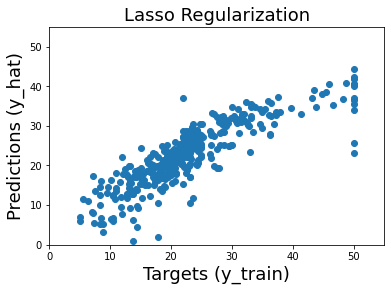

In [25]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.title('Lasso Regularization', size=18)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
# We want the x-axis and the y-axis to be the same
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

Text(0.5, 1.0, 'Training Data Residuals PDF (Lasso Regularization)')

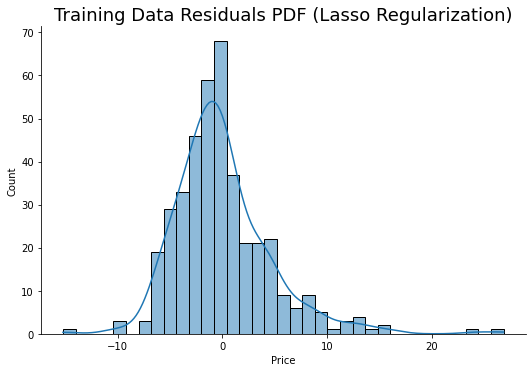

In [26]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat, kde=True, aspect=1.5)

# Include a title
plt.title("Training Data Residuals PDF (Lasso Regularization)", size=18)

# In the best case scenario this plot should be normally distributed

In [27]:
# Create a regression summary of the bias (intercept) and the weights (coefficients) of the regression
lasso_reg_summary = pd.DataFrame(np.append('Intercept', X.columns.values), columns=['Features'])
lasso_reg_summary['Weights'] = np.append(lasso_reg.intercept_, lasso_reg.coef_)
lasso_reg_summary

,Features,Weights
0,Intercept,22.434525
1,CRIM,-1.072773
2,ZN,0.891139
3,INDUS,0.182740
4,CHAS,0.763349
5,NOX,-1.954071
6,RM,2.623003
7,AGE,-0.030733
8,DIS,-2.933295
9,RAD,2.640955


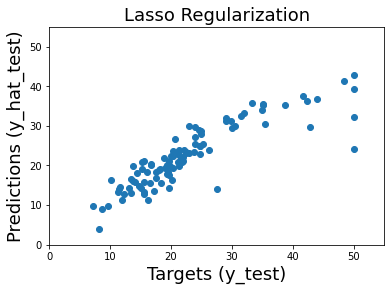

In [28]:
# Create a scatter plot with the test targets and the test predictions
y_hat_test = lasso_reg.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.title('Lasso Regularization', size=18)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

Text(0.5, 1.0, 'Test Data Residuals PDF (Lasso Regularization)')

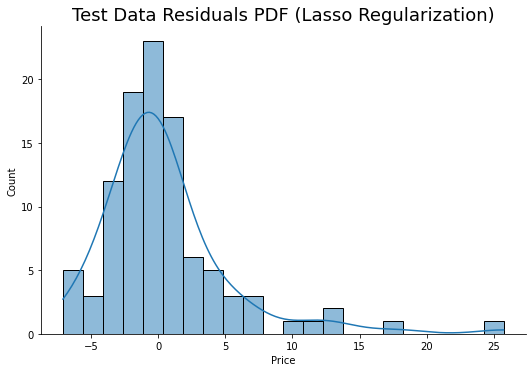

In [29]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_test - y_hat_test, kde=True, aspect=1.5)

# Include a title
plt.title("Test Data Residuals PDF (Lasso Regularization)", size=18)

# In the best case scenario this plot should be normally distributed

### Ridge

In [30]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.86807731, 6.48458733, 7.86702731, 5.93066039, 0.41535363,
       2.81626853, 8.39453235, 2.72001232, 6.73231999, 1.8395969 ,
       2.29241157, 4.95610527, 5.74434225, 8.42711927, 3.32379279,
       5.69848104, 0.44158279, 7.42293478, 8.45124147, 5.68926759,
       5.79103289, 5.7769765 , 0.63609947, 7.35128227, 6.56564019,
       8.40956995, 3.92670967, 6.67086674, 9.11128325, 6.19088944,
       9.34403117, 6.28049865, 1.52281187, 8.15595849, 1.87078983,
       1.63705432, 8.29031248, 1.01773251, 7.39472243, 9.17098042,
       7.06426267, 2.32447534, 5.00588789, 3.48087237, 1.55482681,
       0.23402784, 8.6503175 , 7.5216074 , 9.75267299, 3.64099259]),
        cv=10, normalize=True)

In [31]:
ridgecv.alpha_

0.23402784320166403

In [32]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.23402784320166403)

In [33]:
print('Ridge R-squared = {} and Adjusted R-squared = {} on train data'.format(ridge_model.score(x_train, y_train),
                                                                              adj_r2(ridge_model, x_train, y_train)))

Ridge R-squared = 0.7343550933604462 and Adjusted R-squared = 0.7255002631391279 on train data


In [34]:
print('Ridge R-squared = {} and Adjusted R-squared = {} on test data'.format(ridge_model.score(x_test, y_test),
                                                                             adj_r2(ridge_model, x_test, y_test)))

Ridge R-squared = 0.7556238038248024 and Adjusted R-squared = 0.7195227748443755 on test data


In [35]:
# Let's check the outputs of the regression
y_hat = ridge_model.predict(x_train)

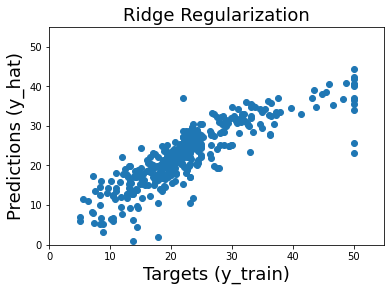

In [36]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.title('Ridge Regularization', size=18)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
# We want the x-axis and the y-axis to be the same
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

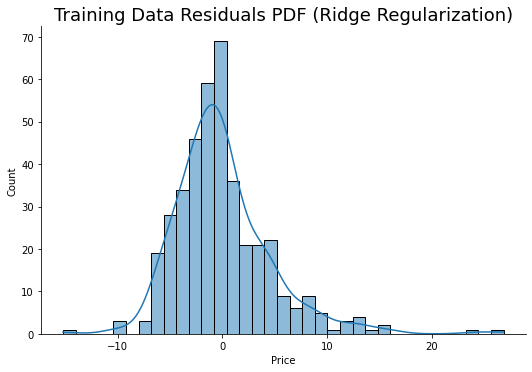

In [37]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat, kde=True, aspect=1.5)

# Include a title
plt.title("Training Data Residuals PDF (Ridge Regularization)", size=18)
plt.show()

# In the best case scenario this plot should be normally distributed

In [38]:
# Create a regression summary of the bias (intercept) and the weights (coefficients) of the regression
ridge_reg_summary = pd.DataFrame(np.append('Intercept', X.columns.values), columns=['Features'])
ridge_reg_summary['Weights'] = np.append(ridge_model.intercept_, ridge_model.coef_)
ridge_reg_summary

,Features,Weights
0,Intercept,22.434509
1,CRIM,-1.074162
2,ZN,0.892771
3,INDUS,0.188941
4,CHAS,0.764066
5,NOX,-1.955291
6,RM,2.624657
7,AGE,-0.035047
8,DIS,-2.933989
9,RAD,2.644231


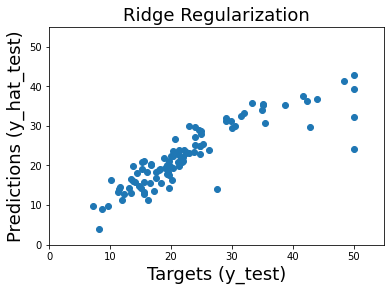

In [39]:
# Create a scatter plot with the test targets and the test predictions
y_hat_test = ridge_model.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.title('Ridge Regularization', size=18)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

Text(0.5, 1.0, 'Test Data Residuals PDF (Ridge Regularization)')

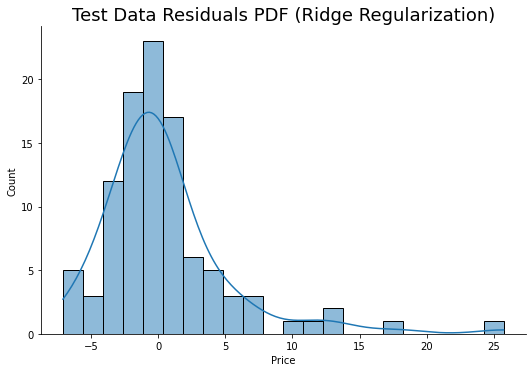

In [40]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_test - y_hat_test, kde=True, aspect=1.5)

# Include a title
plt.title("Test Data Residuals PDF (Ridge Regularization)", size=18)

# In the best case scenario this plot should be normally distributed

### Elastic Net

In [41]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [42]:
elasticCV.alpha_

0.0199735828117252

In [43]:
# l1_ratio gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [44]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0199735828117252)

In [45]:
print('Elastic net R-squared = {} and Adjusted R-squared = {} on train data'.format(elasticnet_reg.score(x_train, y_train),
                                                                              adj_r2(elasticnet_reg, x_train, y_train)))

Elastic net R-squared = 0.7337695123220028 and Adjusted R-squared = 0.7248951627327362 on train data


In [46]:
print('Elastic net R-squared = {} and Adjusted R-squared = {} on test data'.format(elasticnet_reg.score(x_test, y_test),
                                                                                   adj_r2(elasticnet_reg, x_test, y_test)))

Elastic net R-squared = 0.7536068931877853 and Adjusted R-squared = 0.7172079114996173 on test data


In [47]:
# Let's check the outputs of the regression
y_hat = elasticnet_reg.predict(x_train)

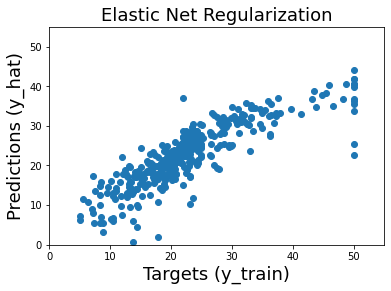

In [48]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.title('Elastic Net Regularization', size=18)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
# We want the x-axis and the y-axis to be the same
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

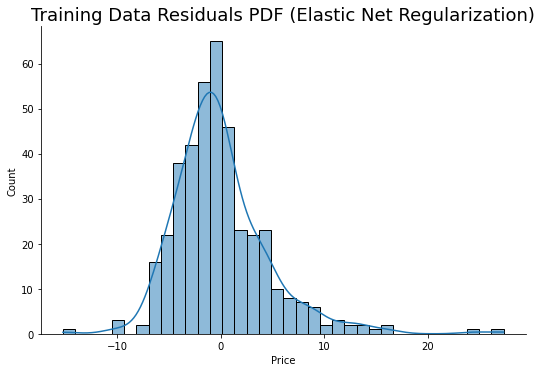

In [49]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat, kde=True, aspect=1.5)

# Include a title
plt.title("Training Data Residuals PDF (Elastic Net Regularization)", size=18)
plt.show()

# In the best case scenario this plot should be normally distributed

In [50]:
# Create a regression summary of the bias (intercept) and the weights (coefficients) of the regression
elasticnet_reg_summary = pd.DataFrame(np.append('Intercept', X.columns.values), columns=['Features'])
elasticnet_reg_summary['Weights'] = np.append(elasticnet_reg.intercept_, elasticnet_reg.coef_)
elasticnet_reg_summary

,Features,Weights
0,Intercept,22.429617
1,CRIM,-1.014437
2,ZN,0.790301
3,INDUS,0.000000
4,CHAS,0.782044
5,NOX,-1.762750
6,RM,2.664717
7,AGE,-0.048337
8,DIS,-2.768784
9,RAD,2.179163


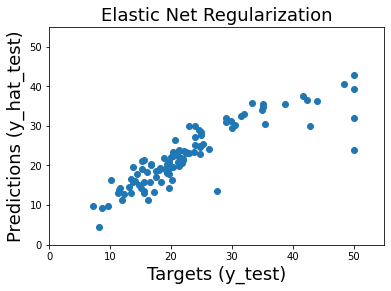

In [51]:
# Create a scatter plot with the test targets and the test predictions
y_hat_test = elasticnet_reg.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.title('Elastic Net Regularization', size=18)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

Text(0.5, 1.0, 'Test Data Residuals PDF (Elastic Net Regularization)')

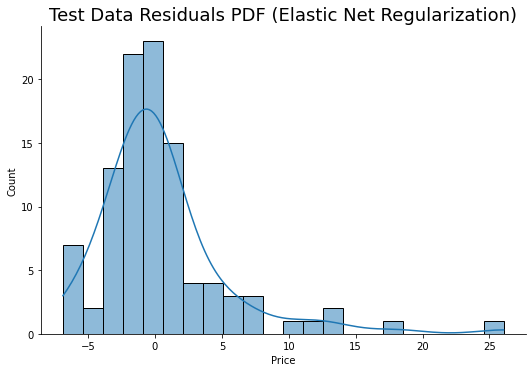

In [52]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_test - y_hat_test, kde=True, aspect=1.5)

# Include a title
plt.title("Test Data Residuals PDF (Elastic Net Regularization)", size=18)

# In the best case scenario this plot should be normally distributed

### The results of the different regularizations are almost similar. Our OLS model did not overfit the data.